# <font color = 'orange'> Decision Tree Clasifier With Post-Prunning and Pre-Prunning

---

## Decision Tree Clasifier With Post-Prunning

### <font color = 'Blue'> Import library , load dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()

dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

---

### <font color = 'Blue'> Description of dataset

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### <font color = '#AA00FF'> Observation :
* This dataset is a kind of multiclass classification problem.

In [5]:
# another ways of getting iris dataset

df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### <font color = '#AA00FF'> Observation :
* Our output features are categorical format we need in numerical.

In [6]:
# numerical is present in dataset used in sklearn
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---

### <font color = 'Blue'> 1. Segregate independent and dependent features.

In [7]:
# independent feature
x = df.iloc[:,:-1]

# dependent feature
y = dataset.target

---

### <font color = 'Blue'> 2. Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33 , random_state = 42) 

---

### <font color = 'red'> Do not use Feature Scaling in Decision Tree.
It is of no use. It will just increase the time complexity. As we spilt the tree based on some condition it do not about scaling.

---

### <font color = 'Blue'> 3. Construct Decision Tree
    
Intially we will do post pruning

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
classifier = DecisionTreeClassifier()

In [11]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

### <font color = '#AA00FF'> Observation :
* Here, Tree get constructed and it also calculated the gini as ceriterian is gini we can make it calculate using entropy. 

#### We can use entropy as well

In [12]:
# can use entropy like this
# Using entropy to the purity of split check
classifier = DecisionTreeClassifier(criterion='entropy')

In [13]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

#### We can display the decision tree

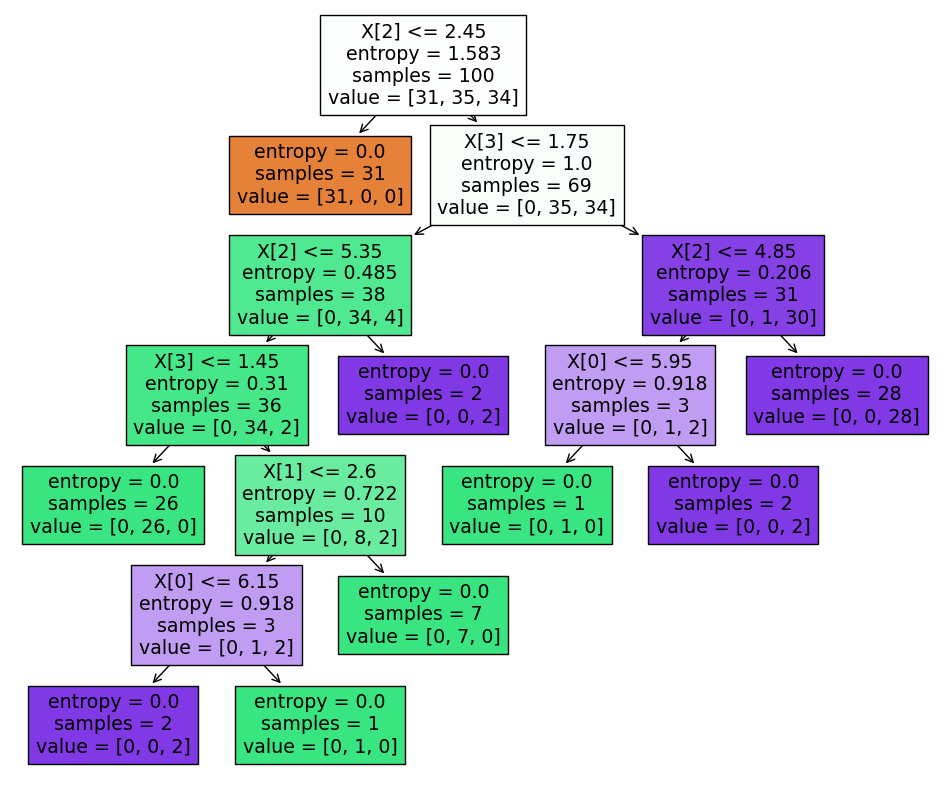

In [14]:
from sklearn import tree

plt.figure(figsize = (12,10))

# filled to fill the colors
tree.plot_tree(classifier,filled = True)

plt.show()

### <font color = '#AA00FF'> Observation 1 :
* In decision tree we select 3rd index feature as root node.
* In level 0, entropy is 0 for left node as it is a pure split and that last node is called as leaf node where we stop further splitting.
* In level 1, entropy is 1 as we can notice that 2 values present in array are same so it is complete impurity split.So, we further split that internal node until we get the leaf nodes. 

### <font color = '#AA00FF'> Observation 2 :
* In level 2, left node indicates 2nd category as 2nd category ratio is more in that node and right node indicates 3rd category so we can avoid further split to reduce overfitting using post-pruning.

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### <font color = 'blue'> Now, we will do post-pruning

In [16]:
# as per observation we have noticed that max of 2 level is enough
classifier = DecisionTreeClassifier(criterion='entropy', max_depth = 2)

In [17]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

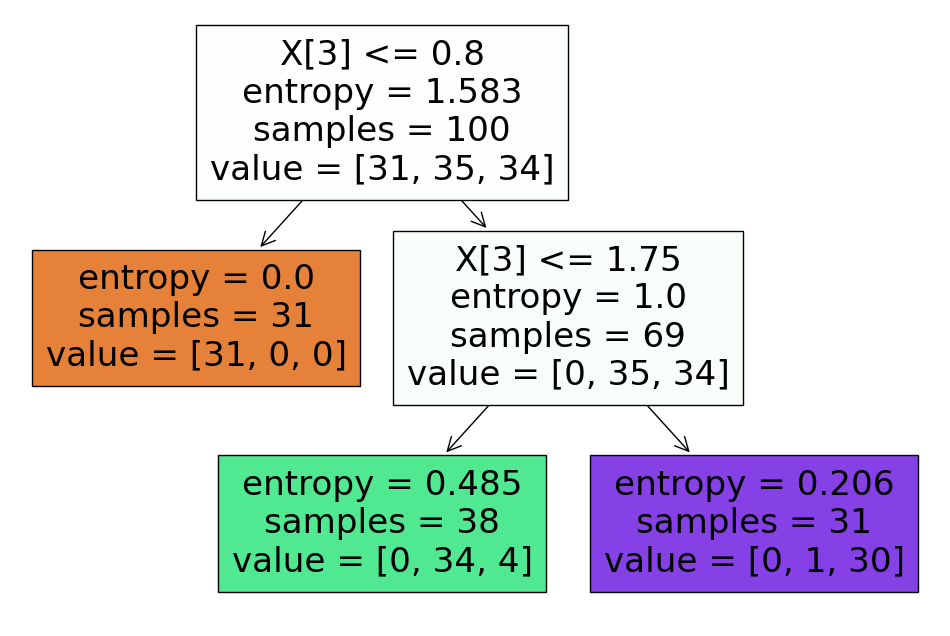

In [18]:
plt.figure(figsize=(12,8))

tree.plot_tree(classifier,filled = True)

plt.show()

### For any new data this decision tree can be used to classify.

---

### <font color = 'Blue'> 4. Prediction

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

---

### <font color = 'Blue'> 5. Performance metrics

In [21]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {score}')
print()

print(classification_report(y_test,y_pred))

Accuracy Score : 0.98

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### <font color = '#AA00FF'> Observation :
* We have got 98% accuracy which is really good but our model may be overfitted.

---

## Decision Tree Clasifier With Pre-Prunning and Hyperparameteric Tuning 
* Used For Huge Data.

### Ignore warnings

In [22]:
# when doing hyper parameteric tuning there will be lot of warnings so we have to ignore them
from warnings import filterwarnings
filterwarnings('ignore')

### Hyperparameter tuning is considering the best parameters present in DecisionTree to create and trian model better.

In [23]:
# we will take all possible parameter and perform grid search cv to get best parameters
paramters = {
    'criterion' : ('gini', 'entropy', 'log_loss'),
    'splitter' : ('best','random') ,
    'max_depth' : [1,2,3,4,5],
    'max_features' : ('auto' ,'sqrt' ,'log2')
}

In [24]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier,param_grid = paramters,scoring = 'accuracy')

In [25]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [26]:
# give the best parameters that can be used to train model which is suitable for our data
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [27]:
y_pred = clf.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {score}')
print()

print(classification_report(y_test,y_pred))

Accuracy Score : 0.98

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### <font color = '#AA00FF'> Observation :
* We have got 98% accuracy which is good and as we have done hyperparameter tuning we tried to reduce the overfitting.

---